In [1]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 2.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 2.1 MB/s            
     |████████████████████████████████| 79 kB 7.1 MB/s             
     |████████████████████████████████| 1.8 MB 36.9 MB/s            
     |████████████████████████████████| 133 kB 51.5 MB/s            
     |████████████████████████████████| 6.6 MB 29.1 MB/s            
     |████████████████████████████████| 2.4 MB 23.0 MB/s            
     |████████████████████████████████| 48 kB 4.8 MB/s             
     |████████████████████████████████| 126 kB 51.1 MB/s            
     |████████████████████████████████| 56 kB 3.2 MB/

### Did you restart the runtime?

If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...).

### Import packages

We import necessary packages.

In [1]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

## Load data

In [4]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

In [31]:
data = pd.read_csv("test_ua_dataset.csv")
target = data.target
data.head()

,title,text,tags,target
0,Вілліан загубився в Арсеналі. Два удари за 20 ...,"Арсенал вилетів з Кубка Англії, програвши Саут...",Футбол|Англія|Вілліан|Арсенал Лондон|чемпіонат...,спорт
1,Меркель закликала Путіна вплинути на бойовикі...,Як зазначив офіційний представник кабінету мін...,|Ангела Меркель|Новини|Володимир Путін|,політика
2,Південна Корея досягла згоди з Путіним щодо К...,Про це після зустрічі з президентом Росії Воло...,|КНДР|Росія|Південна Корея|Північна Корея|Нови...,політика
3,Російський рубль оновив антирекорд 2016 року,Курс російського рубля на торгах на Московськ...,Курс рубля|Рубль|Ціни на нафту,бізнес
4,США нададуть $125 млн для Донбасу та прилегли...,Про це повідомив заступник адміністратора і ке...,|допомога|Донбас|Новини|USAID|російська агресія|,політика


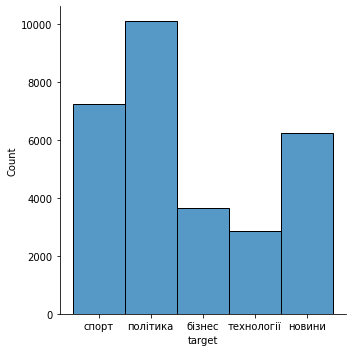

In [32]:
#target.value_counts().plot(kind="bar")
#h = plot_to_str()
sns.displot(x=data['target'])
h = plot_to_str()

## Create a model card

### Initialize toolkit and model card

In [33]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate information into model card

In [34]:
model_card.model_details.name = 'UA-News classification'
model_card.model_details.overview = (
    'This model predicts the correct class of the article which it belongs to.'
)
model_card.model_details.owners = [
    mctlib.Owner(name= 'Ihor Kosovych', contact='ihorvisual@gmail.com')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.limitations = [mctlib.Limitation(description='UA news classification')]
model_card.considerations.use_cases = [mctlib.UseCase(description='UA news classification')]
model_card.considerations.users = [mctlib.User(description='Reporters'), mctlib.User(description='ML researchers')]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(data)} rows with {len(data.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=h),
]
"""model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(data)} rows with {len(data.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=h)#,
    #mctlib.Graphic(image=mean_texture_test)
]"""
#model_card.quantitative_analysis.graphics.description = (
#  'ROC curve and confusion matrix')
#model_card.quantitative_analysis.graphics.collection = [
#    mctlib.Graphic(image=roc_curve),
#    mctlib.Graphic(image=confusion_matrix)
#]

mct.update_model_card(model_card)

## Generate model card

In [35]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))

In [36]:
type(display.HTML(html))

IPython.core.display.HTML

In [38]:
with open('html_file.html', 'w') as f:
    f.write(html)

In [39]:
from google.colab import files
files.download('html_file.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>